### Import packages to connect to S3 bucket 


In [93]:
import boto3
from boto3 import session
import pandas as pd


### making session object


In [94]:
session = boto3.session.Session(region_name='us-west-2')


### #making s3 client


In [110]:
s3client = session.client('s3', config = boto3.session.Config(signature_version='s3v4'))


### creating response using a file name after creating a s3 client


Let us create a function to convert a StreamBody to a python list

In [111]:

def read_file_StreamBody(s3client, filename):
    #filename = input('')
    response = s3client.get_object(Bucket='etongue', Key=filename)
    contents = response['Body'].read()
    decoded_contents = contents.decode("utf-8")
    decoded_contents = decoded_contents.replace('\r\n', '')
    decoded_contents = decoded_contents.split(" ")
    decoded_contents_int = []
    for cont in decoded_contents:
        if cont.isnumeric():
            val = int(cont) 
            decoded_contents_int.append(val)
    return decoded_contents_int
    

In [112]:
z = read_file_StreamBody(s3client, 'E-Tongue data/beer11.txt')
print(z)

[43520, 43534, 43534, 43588, 75, 23144, 27635, 26400, 27318, 26469, 27592, 27320, 27972, 27157, 27672, 26952, 27800, 27434, 28458, 27093, 27420, 27250, 28204, 28306, 27824, 26562, 27248, 27362, 28941, 27217, 27174, 26720, 27750, 28224, 27783, 26499, 26680, 26998, 28337, 27172, 27192, 25898, 26428, 27066, 27528, 26805, 26519, 26352, 27087, 27015, 27196, 26864, 26638, 26625, 26396, 27137, 26904, 26965, 26560, 26553, 26588, 26816, 27025, 26765, 26376, 26617, 26583, 27137, 26624, 26740, 26251, 26701, 26489, 26817, 26555, 26698, 26206, 26538, 26325, 27088, 26455, 26708, 26002, 26816, 26496, 26865, 26058, 26491, 26337, 26991, 26209, 26924, 25926, 26392, 26156, 26864, 26307, 26629, 25814, 26887, 26128, 27218, 25809, 26536, 25882, 26835, 26280, 26828, 25873, 26600, 25705, 26911, 25972, 27136, 25820, 26368, 25829, 26806, 26154, 26903, 25576, 26504, 25607, 27095, 26011, 26989, 25653, 26601, 25813, 26877, 26188, 26771, 25580, 26538, 25940, 27076, 25934, 26919, 25678, 26513, 25703, 26887, 26252, 2

Reading files from s3 bucket looping over response object ['Contents'] "Contents is list of dictionaries, o is the dictionary"

In [113]:
bucket='etongue'
global_list = []
list_of_files = s3client.list_objects(Bucket = bucket, Prefix='E-Tongue data')
for o in list_of_files.get('Contents'):
    z = read_file_StreamBody(s3client, o.get('Key'))
    global_list.append(z)

In [114]:
df = pd.DataFrame(global_list)


In [115]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12290,12291,12292,12293,12294,12295,12296,12297,12298,12299
0,43520,43534,43534,43588,75,23144,27635,26400,27318,26469,...,24375,24615,24025,24560,24524,23848,24324,24289,24008,24178.0
1,228,43524,43524,43532,12823,23649,23300,25079,26065,25221,...,25149,23689,23424,24883,24016,23274,25176,23705,23652,24890.0
2,243,43523,43528,43529,10402,22577,23479,24347,24881,24567,...,23389,24161,23827,23621,23786,24298,23337,24161,24544,23886.0
3,272,43556,43536,43599,83,22528,25826,25911,25912,26436,...,24315,24302,23847,24581,23617,24860,23995,24282,23989,24426.0
4,250,43535,43541,43543,12389,22801,24281,24136,24064,24599,...,23751,24161,23958,24439,23700,24655,24042,24348,24011,24569.0


In [116]:
df.shape

(114, 12300)

In [117]:
list_of_files

{'ResponseMetadata': {'RequestId': '0SSQ9AB48344H59V',
  'HostId': 'rePwBrsLDfSJNiSYUakDpC/L2DPmImxXV4SlH4b0iVrcSGRZ+NecuU/AO3pPxZvDf5WXsfk99/8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'rePwBrsLDfSJNiSYUakDpC/L2DPmImxXV4SlH4b0iVrcSGRZ+NecuU/AO3pPxZvDf5WXsfk99/8=',
   'x-amz-request-id': '0SSQ9AB48344H59V',
   'date': 'Fri, 15 Apr 2022 16:36:05 GMT',
   'x-amz-bucket-region': 'us-west-2',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'IsTruncated': False,
 'Marker': '',
 'Contents': [{'Key': 'E-Tongue data/beer11.txt',
   'LastModified': datetime.datetime(2022, 4, 11, 17, 32, 40, tzinfo=tzutc()),
   'ETag': '"e57c2b4044c751d107e1621dcb95eddd"',
   'Size': 73671,
   'StorageClass': 'STANDARD',
   'Owner': {'DisplayName': 'gargiitk',
    'ID': 'f1f4171ca95d040d12c4111e6eb45ed7fb22f753bc16d43cdb9c423d29599f1a'}},
  {'Key': 'E-Tongue data/beer12.txt',
   'LastModified': datetime.datetime(2022, 4,

In [118]:
labels = []
for o in list_of_files.get('Contents'):
    labels.append(o.get('Key'))
label =[]
for ele in labels:
    label.append(ele[14:-4])

In [119]:
label

['beer11',
 'beer12',
 'beer13',
 'beer21',
 'beer22',
 'beer23',
 'beer31',
 'beer41',
 'beer42',
 'beer43',
 'beer51',
 'beer52',
 'beer53',
 'beer61',
 'beer62',
 'beer63',
 'beer71',
 'beer72',
 'beer73',
 'blackTea11',
 'blackTea12',
 'blackTea13',
 'blackTea21',
 'blackTea22',
 'blackTea23',
 'blackTea31',
 'blackTea32',
 'blackTea33',
 'coffee11',
 'coffee12',
 'coffee13',
 'coffee21',
 'coffee22',
 'coffee23',
 'coffee31',
 'coffee32',
 'coffee33',
 'cola11',
 'cola12',
 'cola13',
 'cola21',
 'cola22',
 'cola31',
 'maofengTea11',
 'maofengTea12',
 'maofengTea13',
 'maofengTea21',
 'maofengTea22',
 'maofengTea23',
 'maofengTea31',
 'maofengTea32',
 'maofengTea33',
 'medicine11',
 'medicine12',
 'medicine13',
 'medicine21',
 'medicine22',
 'medicine23',
 'milk11',
 'milk12',
 'milk13',
 'milk21',
 'milk22',
 'milk23',
 'milk31',
 'milk32',
 'milk33',
 'oolongTea11',
 'oolongTea12',
 'oolongTea13',
 'oolongTea21',
 'oolongTea22',
 'oolongTea23',
 'oolongTea31',
 'oolongTea32',
 'o

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Columns: 12300 entries, 0 to 12299
dtypes: float64(1), int64(12299)
memory usage: 10.7 MB


In [121]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)
print(df)

     0      1      2      3      4      5      6      7      8      9      \
0    43520  43534  43534  43588     75  23144  27635  26400  27318  26469   
1      228  43524  43524  43532  12823  23649  23300  25079  26065  25221   
2      243  43523  43528  43529  10402  22577  23479  24347  24881  24567   
3      272  43556  43536  43599     83  22528  25826  25911  25912  26436   
4      250  43535  43541  43543  12389  22801  24281  24136  24064  24599   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
109  29721  28822  28333  17252  19297  20647  21208  22031  22013  22531   
110  31778  29933  30106  17957  20792  20580  22130  21784  22777  21935   
111  31747  30052  29870  16304  19545  20161  21344  21528  22284  22159   
112  32449  31555  30179  17616  19612  21213  21397  22333  22119  22816   
113  32989  30866  30665  16904  20087  20419  21888  21563  22487  22100   

     ...  12290  12291  12292  12293  12294  12295  12296  12297  12298  \


In [124]:
from sklearn.decomposition import PCA
pca=PCA(2)
df_new = pca.fit_transform(df)

In [125]:
df_new.shape


(114, 2)

In [133]:
# Import KMeans
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 13)

# Fit model to points
model.fit(df_new)

# Determine the cluster labels of new_points: labels
label = model.predict(df_new)

# Print cluster labels of new_points
print(label)

[ 4  4  4  4  4  4  4  8  8  8 11 11 11  8  8 10  5  8  1 11  8  8  8  8
  8 10 10 10  4  4  4  4  4  4  4  4  4  0  0  0  0  0  0  8  8  8  8 10
 10 10 10 10  0  0  0  0  0  0  2 12 12  2  2  2  2  2  2  8  8  8  8  8
  8 10 10 10  8  8  8 10 10 10 10 10 10  1  1  1  1  1  1  1  1  2  6  6
  3  3  3  7  7  7  9  9  9  9  9  9  5  5  5  5  5  5]


In [137]:
import matplotlib.pyplot as plt
import numpy as np


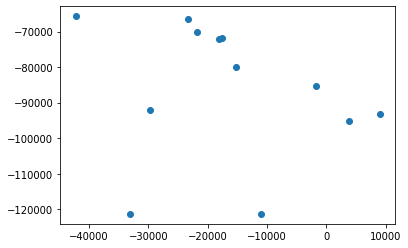

In [138]:
#filter rows of original data
filtered_label0 = df_new[label == 0]

# plotting the results
plt.scatter(filtered_label0[:,0], filtered_label0[:,1])
plt.show()

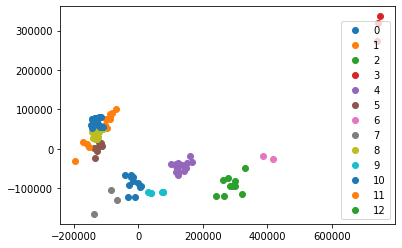

In [140]:
#getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df_new[label == i, 0], df_new[label == i, 1], label = i)
plt.legend()
plt.show()